In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from pandas.plotting import parallel_coordinates

In [2]:
data_2015 = pd.read_csv('2015.csv')

In [3]:
data_2015.columns = data_2015.columns.str.replace(' ','_')

In [4]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data_2015.isnull().sum()

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

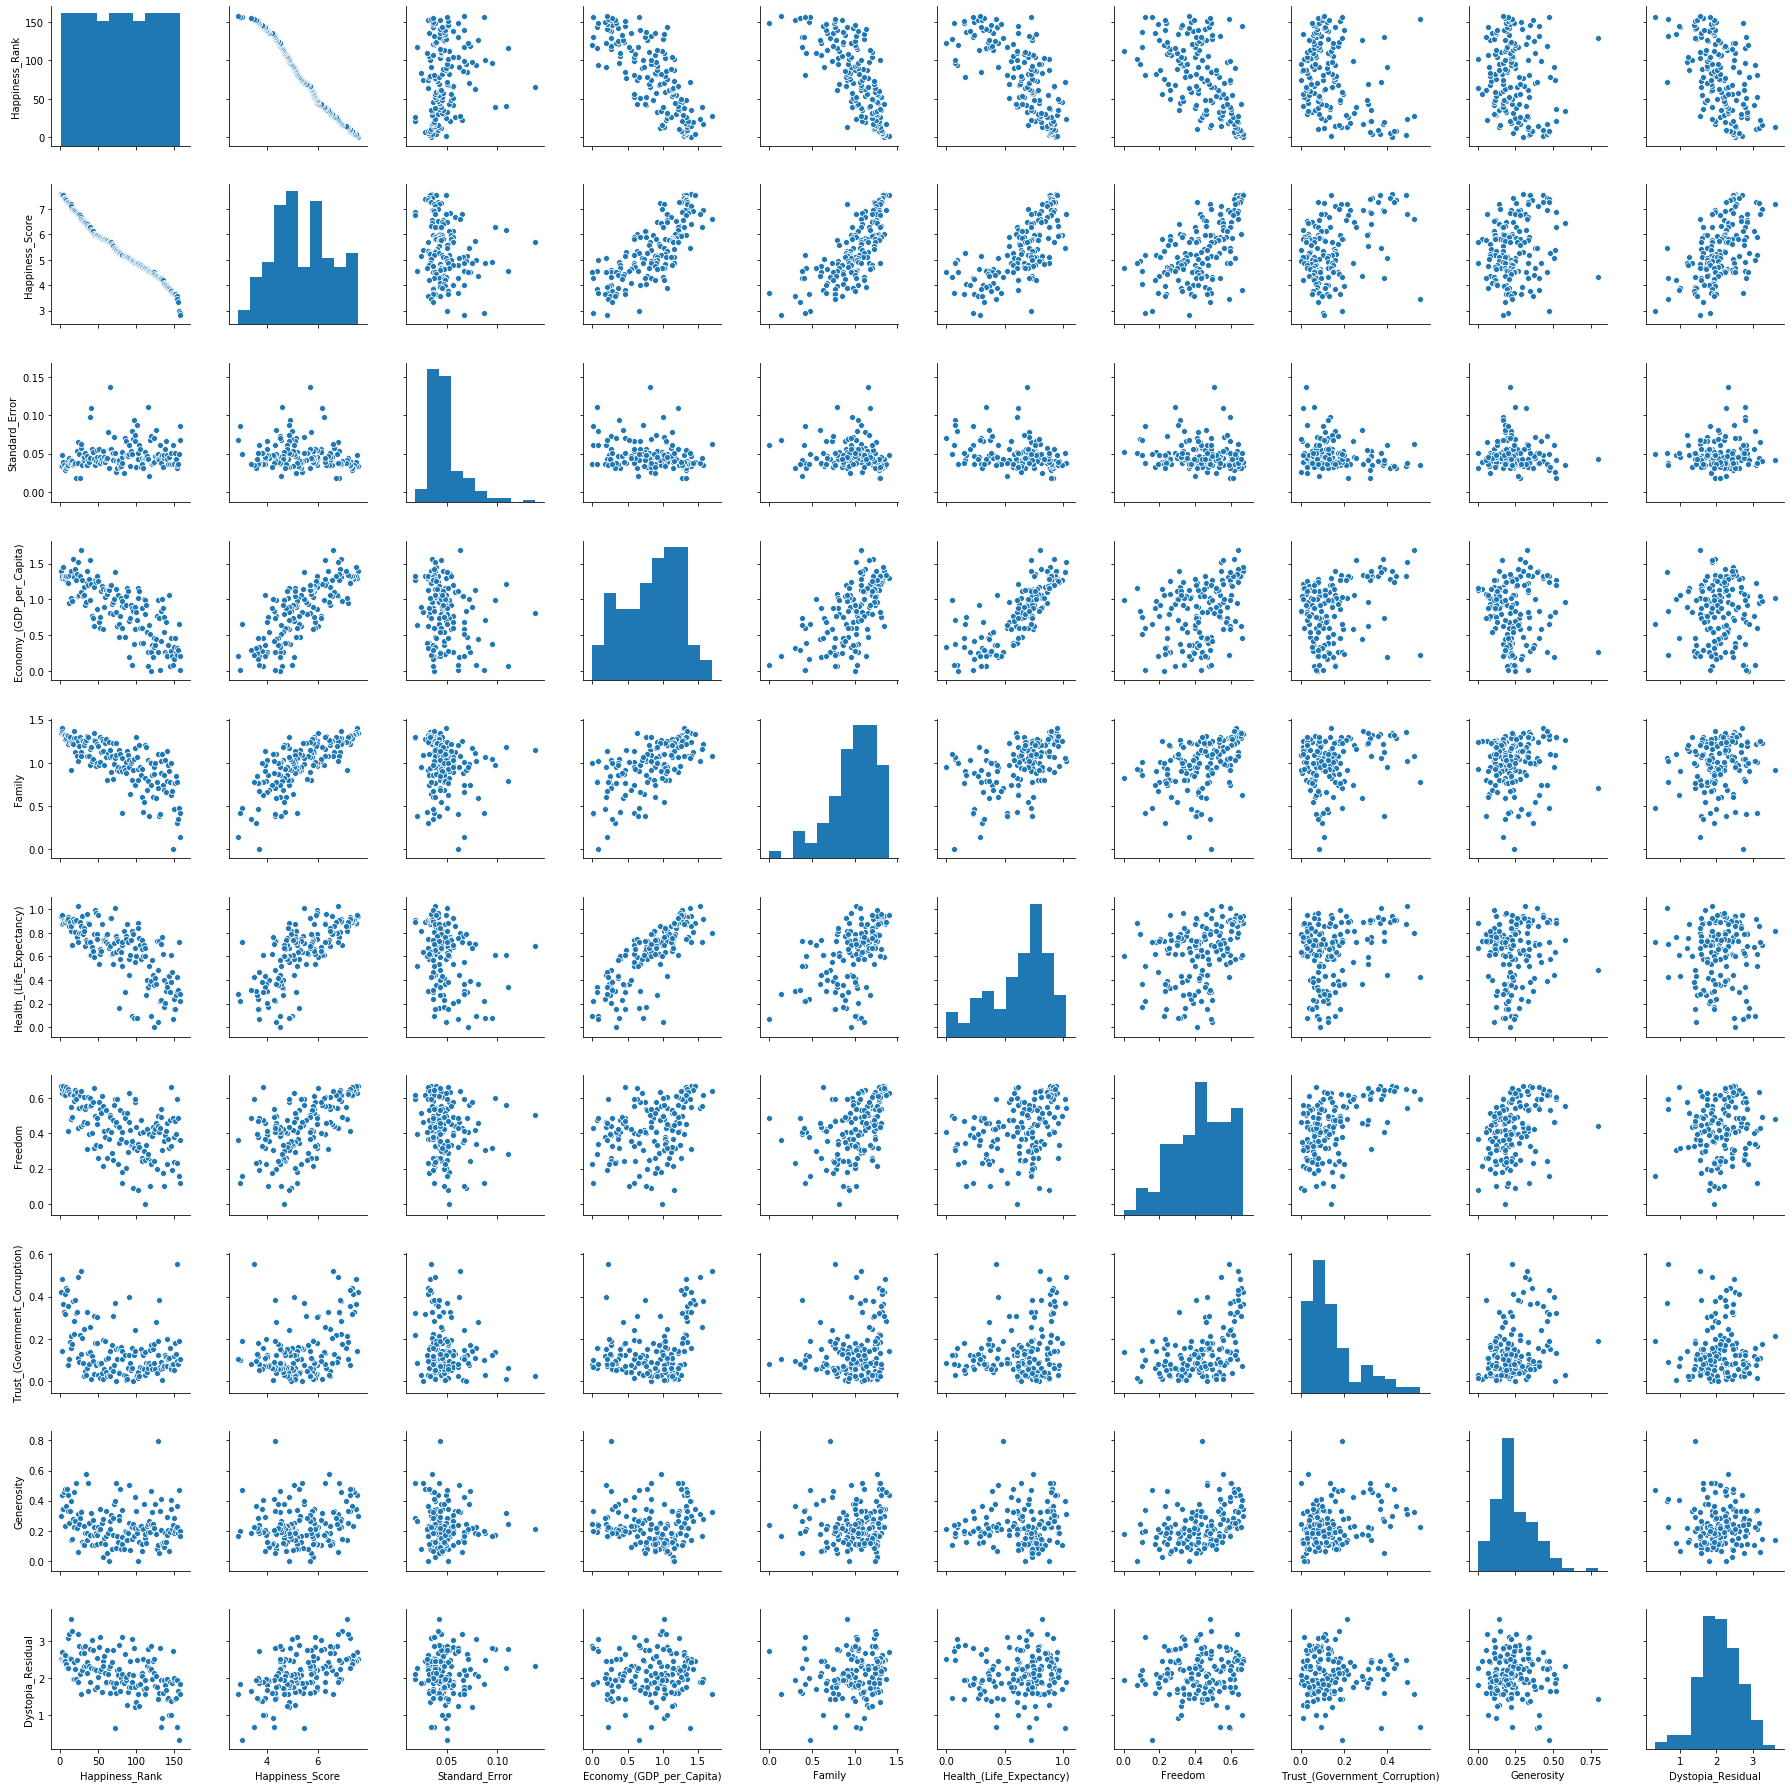

In [6]:
sns.pairplot(data_2015)

# 10 Poorest Country

In [7]:
region_gdp = data_2015['Economy_(GDP_per_Capita)'].groupby(data_2015['Region'])

In [8]:
region_gdp.mean().sort_values()

Region
Sub-Saharan Africa                 0.380473
Southern Asia                      0.560486
Southeastern Asia                  0.789054
Latin America and Caribbean        0.876815
Central and Eastern Europe         0.942438
Middle East and Northern Africa    1.066973
Eastern Asia                       1.151780
Australia and New Zealand          1.291880
Western Europe                     1.298596
North America                      1.360400
Name: Economy_(GDP_per_Capita), dtype: float64

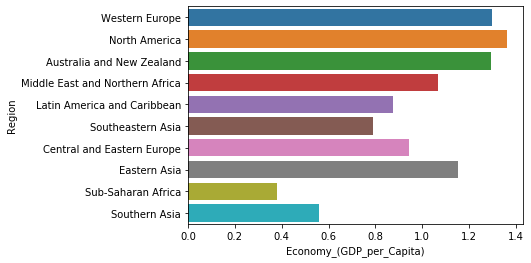

In [9]:
sns.barplot(x='Economy_(GDP_per_Capita)', y='Region', data = data_2015,ci=None)

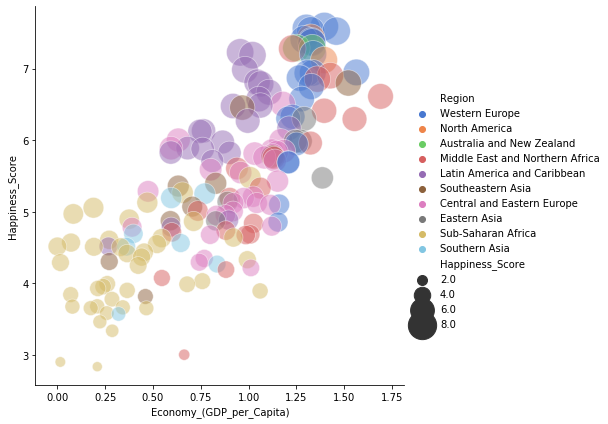

In [10]:
region_gdp_scatter = sns.relplot(x='Economy_(GDP_per_Capita)',y='Happiness_Score',hue='Region',data=data_2015,size="Happiness_Score",
            sizes=(100, 800), alpha=.5, palette="muted",
            height=6)

# region_scatter.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [11]:
data_2015[['Country', 'Economy_(GDP_per_Capita)']].sort_values(by = 'Economy_(GDP_per_Capita)',
            ascending = True).head(10)

,Country,Economy_(GDP_per_Capita)
119,Congo (Kinshasa),0.00000
156,Burundi,0.01530
130,Malawi,0.01604
143,Niger,0.06940
115,Liberia,0.07120
147,Central African Republic,0.07850
93,Mozambique,0.08308
149,Guinea,0.17417
90,Somaliland region,0.18847
121,Ethiopia,0.19073


# 10 Countries With Unhappy Homes

In [12]:
region_family = data_2015['Family'].groupby(data_2015['Region'])

In [13]:
region_family.mean().sort_values()

Region
Southern Asia                      0.645321
Sub-Saharan Africa                 0.809085
Middle East and Northern Africa    0.920490
Southeastern Asia                  0.940468
Central and Eastern Europe         1.053042
Eastern Asia                       1.099427
Latin America and Caribbean        1.104720
Western Europe                     1.247302
North America                      1.284860
Australia and New Zealand          1.314450
Name: Family, dtype: float64

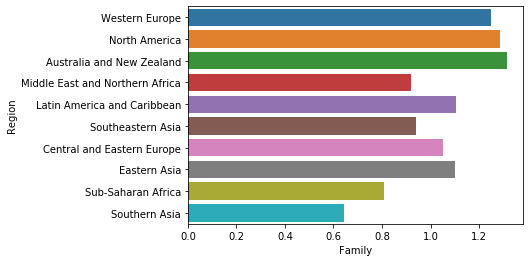

In [14]:
sns.barplot(x='Family', y='Region', data = data_2015,ci=None)

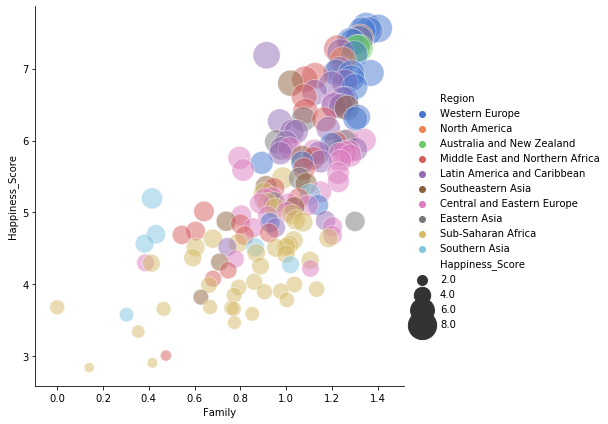

In [15]:
region_family_scatter = sns.relplot(x='Family',y='Happiness_Score',hue='Region',data=data_2015,size="Happiness_Score",
            sizes=(100, 800), alpha=.5, palette="muted",
            height=6)

In [16]:
data_2015[['Country', 'Family']].sort_values(by = 'Family',
            ascending = True).head(10)

,Country,Family
147,Central African Republic,0.00000
157,Togo,0.13995
152,Afghanistan,0.30285
154,Benin,0.35386
116,India,0.38174
129,Georgia,0.38562
130,Malawi,0.41134
80,Pakistan,0.41411
156,Burundi,0.41587
108,Bangladesh,0.43106


# 10 Unhealthy Countries

In [17]:
region_health = data_2015['Health_(Life_Expectancy)'].groupby(data_2015['Region'])

In [18]:
region_health.mean().sort_values()

Region
Sub-Saharan Africa                 0.282332
Southern Asia                      0.540830
Southeastern Asia                  0.677357
Latin America and Caribbean        0.703870
Middle East and Northern Africa    0.705616
Central and Eastern Europe         0.718774
Eastern Asia                       0.877388
North America                      0.883710
Western Europe                     0.909148
Australia and New Zealand          0.919965
Name: Health_(Life_Expectancy), dtype: float64

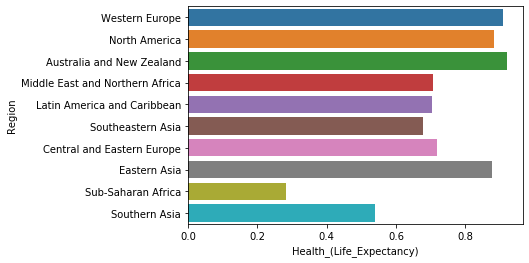

In [19]:
sns.barplot(x='Health_(Life_Expectancy)', y='Region', data = data_2015,ci=None)

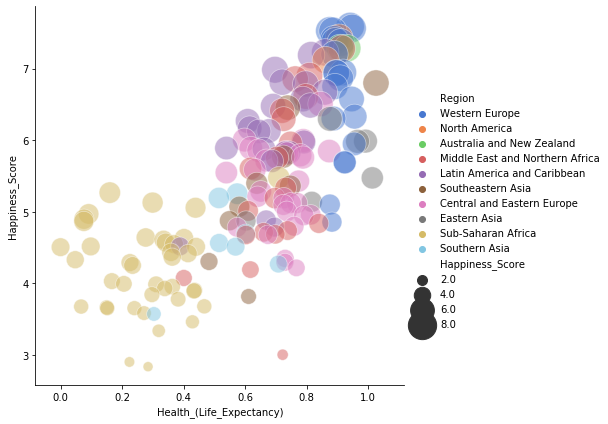

In [20]:
region_health_scatter = sns.relplot(x='Health_(Life_Expectancy)',y='Happiness_Score',hue='Region',data=data_2015,size="Happiness_Score",
            sizes=(100, 800), alpha=.5, palette="muted",
            height=6)

In [21]:
data_2015[['Country', 'Health_(Life_Expectancy)']].sort_values(by = 'Health_(Life_Expectancy)',
            ascending = True).head(10)

,Country,Health_(Life_Expectancy)
122,Sierra Leone,0.00000
127,Botswana,0.04776
147,Central African Republic,0.06699
100,Swaziland,0.07566
96,Lesotho,0.07612
93,Mozambique,0.09131
119,Congo (Kinshasa),0.09806
148,Chad,0.15010
150,Ivory Coast,0.15185
77,Nigeria,0.16007
